# Predictive Analysis for Laptop Pricing - Solution

## Table Of Contents

* [Business Problem Statement](#business-problem-statement)
* [Data Description](#data-description)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Multicollinearity Check](#multicollinearity-check)
* [Train/Val/Test Split](#train/val/test-split)
* [Classical Machine Learning](#classical-machine-learning)
    * [Linear Regression](#linear-regression)
    * [MLP Regressor](#mlp-regressor)
    * [Decision Tree Regressor](#decision-tree-regressor)
    * [Random Forest Regressor](#random-forest-regressor)
    * [Gradient Boosting Regressor](#gradient-boosting-regressor)
    * [Extra Trees Regressor](#extra-trees-regressor)
    * [Voting Regressor](#voting-regressor)
* [Deep Learning](#deep-learning)
* [Feature Selection](#feature-selection)

<a name="business-problem-statement"></a>

# Business Problem Statement:

The primary business objective is to develop a robust machine learning model capable of accurately predicting the price of a laptop based on its attributes. The buynow_price column in the dataset serves as the target variable for this prediction task. By leveraging various features such as CPU cores, RAM size, CPU clock speed, drive memory size, screen size, resolution, operating system, and other relevant attributes, the model aims to provide valuable insights into the pricing dynamics of laptops in the market. The ultimate goal is to minimize the Root Mean Squared Error (RMSE) measure during testing and comparison of different models, ensuring that the predictions closely align with the actual prices. This predictive capability can empower businesses in the laptop industry to optimize pricing strategies, enhance customer satisfaction, and ultimately drive profitability.

![Image](https://thinkingneuron.com/wp-content/uploads/2020/09/Computer-price-prediction-case-study.png)

<a name="data-description"></a>

# Data Description:

The dataset has been preprocessed and partitioned into three distinct sets: training, validation, and testing. These sets are stored in separate files named train_dataset.json, val_dataset.json, and test_dataset.json, respectively. Each file is formatted as a JSON object and saved using the orient='columns' parameter. This format ensures that the data is organized in a tabular structure, with rows representing individual instances and columns corresponding to different attributes or features of laptops. By having distinct training, validation, and test sets, the dataset facilitates the development, evaluation, and comparison of machine learning models for predicting the price (buynow_price) of laptops based on their attributes.

<a name="exploratory-data-analysis"></a>

# Exploratory Data Analysis:

 In this EDA, we utilized Python's pandas library to load three datasets: train_dataset.json, test_dataset.json, and val_dataset.json, each representing a partition of the overall dataset. After loading the datasets, they were concatenated along the row axis to create a unified DataFrame named df. The .head(10) method was then employed to display the first ten rows of the combined dataset, offering a glimpse into its structure and contents. This preliminary exploration allows us to observe the features and their corresponding values, identify any missing or inconsistent data, and gain insights into potential patterns or trends. Subsequent steps in the EDA process may include data cleaning, visualizations, statistical summaries, and feature engineering, all aimed at preparing the data for modeling and deriving actionable insights.

In [5]:
# Import necessary modules
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Read datasets
train_data = pd.read_json("./datasets/train_dataset.json", orient="columns")
test_data = pd.read_json("./datasets/test_dataset.json", orient="columns")
val_data = pd.read_json("./datasets/val_dataset.json", orient="columns")

# Concatenate datasets
combined_data = pd.concat([train_data, val_data, test_data], axis=0)
combined_data


,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,new,1256.0,producer warranty,"15"" - 15.9""",5589.0
10057,dedicated graphics,None,other,2,None,None,ssd,None,None,None,NaN,intel core i7,new,NaN,producer warranty,"15"" - 15.9""",5399.0
6980,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,32 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[camera, speakers, microphone]",ddr4,2.8,intel core i7,new,240.0,producer warranty,"15"" - 15.9""",8678.0
4480,dedicated graphics,[bluetooth],1920 x 1080,4,8 gb,None,hdd,None,None,None,NaN,intel core i5,new,1.0,producer warranty,"15"" - 15.9""",4722.0


Removing a specific column from the dataset and eliminates rows with incomplete information.

In [6]:

# Drop unnecessary column
combined_data = combined_data.drop(columns=['state'])
combined_data = combined_data.dropna()
combined_data.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.0



Columns with multiple values in a single cell are identified and stored in a list named "compacted_columns".

In [7]:
# Columns with multiple values in a cell
compacted_columns = ['communications', 'input devices', 'multimedia']


Obtaining unique values for each feature. This function takes a column name as input and creates a DataFrame to store the values. It then iterates through the columns of the DataFrame, extracting unique values and appending them to a list. This list is then returned. Additionally, a dictionary named "compacted_dict" is initialized to store unique values for each compact column. The function "extract_unique_vals" is applied to all columns with multiple values in a single cell, and the unique values are stored in the dictionary accordingly.

In [19]:
# Function to get unique values of each feature
def extract_unique_vals(column_name):
    column_df = pd.DataFrame(combined_data[column_name].to_list())
    unique_values = list()
    for col in column_df.columns.to_list():
        unique_values += [val for val in list(column_df[col].unique()) if (val not in unique_values and val)]
    return unique_values

# Dictionary to store unique values for each compact column
compacted_dict = {col: [] for col in compacted_columns}

# Apply extract_unique_vals to all compacted_columns
for col in compacted_columns:
    compacted_dict[col] = extract_unique_vals(col)

compacted_dict

{'communications': ['bluetooth',
  'wi-fi',
  'wi-fi 802.11 b/g/n/ac',
  'lan 10/100 mbps',
  'wi-fi 802.11 a/b/g/n/ac',
  'nfc (near field communication)',
  'lan 10/100/1000 mbps',
  'gps',
  'wi-fi 802.11 b/g/n',
  'intel wireless display (widi)',
  'wi-fi 802.11 a/b/g/n',
  'modem 3g (wwan)',
  'modem 4g (lte)'],
 'input devices': ['keyboard',
  'touchpad',
  'illuminated keyboard',
  'numeric keyboard'],
 'multimedia': ['SD card reader', 'camera', 'microphone', 'speakers']}

 Modifying the "RAM size" column in the dataset by removing the ' gb' string from each value and replacing '256 mb' with '0.256'.

In [9]:
# Transform RAM size column
combined_data['RAM size'] = combined_data['RAM size'].str.replace(' gb', '', regex=True)
combined_data['RAM size'] = combined_data['RAM size'].str.replace('256 mb', '0.256', regex=False)


Converting the values in the "screen size" column to integers by extracting the first two characters of each value and converting them to integers.







In [10]:
# Convert screen size column to integers
combined_data['screen size'] = combined_data['screen size'].apply(lambda x: int(str(x)[:2]))


Splitting the "resolution (px)" column into two separate columns, "resolution_x" and "resolution_y". Each value in the original column is split by the 'x' delimiter, and the resulting parts are converted to integers and assigned to their respective new columns. Finally, the original "resolution (px)" column is dropped from the dataset.

In [11]:
# Split resolution (px) column into two columns
combined_data['resolution_x'] = combined_data['resolution (px)'].apply(lambda x: x.split(' x ')[0]).astype(int)
combined_data['resolution_y'] = combined_data['resolution (px)'].apply(lambda x: x.split(' x ')[1]).astype(int)
combined_data = combined_data.drop(columns=['resolution (px)'])

Selecting a list of numerical column names, including 'CPU cores', 'RAM size', 'CPU clock speed (GHz)', 'drive memory size (GB)', 'screen size', 'resolution_x', and 'resolution_y'. It then creates a new DataFrame called "numerical_data" containing only these numerical columns from the combined dataset, converting them to floating-point data type for numerical processing.







In [12]:

# Put all numerical columns together
numerical_columns = ['CPU cores', 'RAM size', 'CPU clock speed (GHz)', 'drive memory size (GB)', 'screen size', 'resolution_x', 'resolution_y']
numerical_data = combined_data[numerical_columns].astype(float)

Converting the "operating system" column into categorical variables by creating dummy variables. It first joins the strings within each cell using '|' as a separator and then creates dummy variables using the get_dummies() function. This process creates binary columns for each unique value in the "operating system" column, indicating the presence or absence of each value in each row.

In [21]:

# Convert operating system column to categories
dummies_data = combined_data['operating system'].str.join('|').str.get_dummies()
dummies_data.head()


,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,windows 8.1 professional 64-bit
7233,1,0,0,0,0,0,0,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,0
4870,0,0,1,0,0,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,0


Iterating over a list of column names, including 'drive type', 'RAM type', and 'CPU model', and applies the same logic used for the 'operating system' column to create dummy variables. For each column, it creates dummy variables using the get_dummies() function and then concatenates them with the existing dummy variables stored in the 'dummies_data' DataFrame along the column axis. This process ensures that binary columns are created for each unique value in these categorical columns, capturing their presence or absence in each row of the dataset.

In [22]:
# Apply same logic to other suitable variables
dummy_columns = ['drive type', 'RAM type', 'CPU model']
for col in dummy_columns:
    col_dummies_data = combined_data[col].str.get_dummies()
    dummies_data = pd.concat([dummies_data, col_dummies_data], axis=1)
dummies_data.head()

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4870,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


 Identifying the remaining columns in the dataset after removing columns with multiple values in a single cell and the label column. It creates a list named "categorical_columns" containing the names of these remaining columns. This list is generated by iterating over all columns in the dataset and excluding those listed in "compacted_columns" and "label_column".







In [27]:
# Check remaining columns
label_column = ['buynow_price']
categorical_columns = [col for col in combined_data.columns.to_list() if col not in compacted_columns + label_column + numerical_columns + dummy_columns + ['operating system']]
categorical_columns

['graphic card type', 'warranty']

 Ensjuring that all elements within the "categorical_columns" list are converted to strings. It checks each element in the list and converts it to a string if it is not already one. Then, it uses the pd.get_dummies() function to encode the remaining categorical columns in the combined dataset. This process creates dummy variables for each unique value in the categorical columns, resulting in a binary representation of the categorical data.

In [29]:
# Encode remaining categorical columns
categorical_data = pd.get_dummies(combined_data[categorical_columns])
categorical_data.head()

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
7233,1,0,1,0
5845,1,0,0,1
5897,0,1,1,0
4870,0,1,1,0
2498,1,0,1,0


 Crearting a DataFrame named "compacted_data" with columns corresponding to unique values extracted from columns with multiple values in a single cell. It first consolidates all unique values from the compacted columns into a list named "unique_columns". Then, it initializes the "compacted_data" DataFrame with these unique columns and fills it with zeros. Each row of the DataFrame represents an instance in the combined dataset, with binary indicators for the presence or absence of each unique value in the respective compacted columns.

In [30]:
# Put unique_vals to compact_df columns
unique_columns = list()
for col in compacted_columns:
    unique_columns += compacted_dict[col]
compacted_data = pd.DataFrame(columns=unique_columns , index=combined_data.index, data=np.zeros((combined_data.shape[0], len(unique_columns))))


 Populating the "compacted_data" DataFrame with values derived from the original combined dataset. It iterates over each compacted column along with its corresponding list of unique values stored in "compacted_dict". For each unique value within a compacted column, it checks if that value is present in each row of the original combined dataset. If the unique value is present, it assigns 1 to the corresponding cell in "compacted_data"; otherwise, it assigns 0. This process effectively encodes the presence or absence of each unique value in the compacted columns into the binary format of the "compacted_data" DataFrame.

In [31]:
# Get the values of compact_df from original dataframe
for col, unique_list in compacted_dict.items():
    for unique in unique_list:
        compacted_data[unique] = combined_data[col].apply(lambda x: 1 if unique in x else 0)


 Concatinating all processed DataFrames, including "categorical_data", "numerical_data", "compacted_data", and "dummies_data", along the column axis. The resulting DataFrame, named "processed_data", contains all the processed features and is ready for further analysis or model training.

In [33]:
# Concatenate all processed dataframes
processed_data = pd.concat([categorical_data, numerical_data, compacted_data, dummies_data], axis=1)
processed_data.head()

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,1,0,4.0,32.0,2.6,1250.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
5845,1,0,0,1,4.0,8.0,2.4,256.0,15.0,1366.0,...,0,0,0,0,0,1,0,0,0,0
5897,0,1,1,0,4.0,8.0,1.2,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,0,1
4870,0,1,1,0,2.0,8.0,2.0,1000.0,15.0,1366.0,...,0,0,0,1,0,0,0,0,0,0
2498,1,0,1,0,4.0,8.0,2.4,1000.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0


<a name="multicollinearity-check"></a>

# Multicollinearity Check :

In regression analysis, multicollinearity can hinder the accuracy and interpretability of the model by inflating the standard errors of the coefficients. To address this issue, we employ the Variance Inflation Factor (VIF) as a diagnostic tool. A VIF score above 20 indicates problematic multicollinearity. Our approach involves iteratively assessing the VIF scores of each feature and eliminating one feature at a time, as the VIF scores change when the feature set is altered. By systematically dropping features with VIF scores exceeding the threshold of 20 in each iteration, we aim to mitigate multicollinearity while preserving the predictive power of the model. This iterative process ensures that only the most highly correlated features are removed, allowing us to build a regression model that is robust and reliable for predicting laptop prices based on their attributes.




import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:

# Compute VIF score
def calculate_vif(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(processed_data[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)


 Calculating the Variance Inflation Factor (VIF) for all columns in the "processed_data" DataFrame. It first generates a list named "features_list" containing the column names of the processed data. Then, it calls the function "calculate_vif" with "features_list" as input to compute the VIF scores for each feature. The resulting VIF scores are stored in the "vif_results" variable, providing insights into the multicollinearity among the features.

In [35]:
# Apply VIF computation to all columns
features_list = processed_data.columns.to_list()
vif_results = calculate_vif(features_list)

/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stat

 tteratively dropping the feature with the highest VIF score until all VIF scores are under 20. It sets a flag "multicollinearity" to True to initiate the while loop. Within each iteration, it identifies the feature with the highest VIF score and removes it from the "features_list". Then, it recalculates the VIF scores for the updated feature list. The while loop continues until there are no VIF scores exceeding the threshold of 20. Finally, it extracts the list of selected features with reduced multicollinearity, stored in the "selected_features" variable, for further analysis or model training.

In [36]:

# Drop with highest VIF score until all VIF scores are under 20
multicollinearity = True
while multicollinearity:
    highest_vif_feature = vif_results['feature'].values.tolist()[-1]
    print("Removing feature with high VIF:", highest_vif_feature)
    features_list.remove(highest_vif_feature)
    vif_results = calculate_vif(features_list)
    multicollinearity = False if len(vif_results[vif_results.VIF > 20]) == 0 else True
selected_features = vif_results['feature'].values.tolist()

Removing feature with high VIF: other CPU


/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stat

Removing feature with high VIF: graphic card type_dedicated graphics


/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stat

Removing feature with high VIF: ssd


/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/qritrim/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Removing feature with high VIF: ddr3
Removing feature with high VIF: warranty_producer warranty
Removing feature with high VIF: resolution_x
Removing feature with high VIF: touchpad
Removing feature with high VIF: screen size
Removing feature with high VIF: camera
Removing feature with high VIF: CPU clock speed (GHz)
Removing feature with high VIF: windows 10 home
Removing feature with high VIF: keyboard
Removing feature with high VIF: intel core i7
Removing feature with high VIF: bluetooth
Removing feature with high VIF: CPU cores
Removing feature with high VIF: microphone


 Importing the seaborn library as "sns" and the pyplot module from matplotlib as "plt". Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. These libraries will likely be used for visualizing data and generating plots in the subsequent analysis.

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt

Generating a heatmap plot to visualize the correlation matrix between the selected features and the target variable. It sets the figure size to 20x20 inches using plt.figure(figsize=(20, 20)). The correlation matrix is computed by concatenating the selected features from the processed data and the label column from the combined data. Then, sns.heatmap() function from the seaborn library is used to create the heatmap plot, with annot=True parameter to display the correlation values on the plot, and lw=1 parameter to adjust the linewidths of the grid lines. Finally, plt.show() displays the heatmap plot. This visualization helps to understand the relationships between the features and the target variable, providing insights into potential predictors of laptop prices.

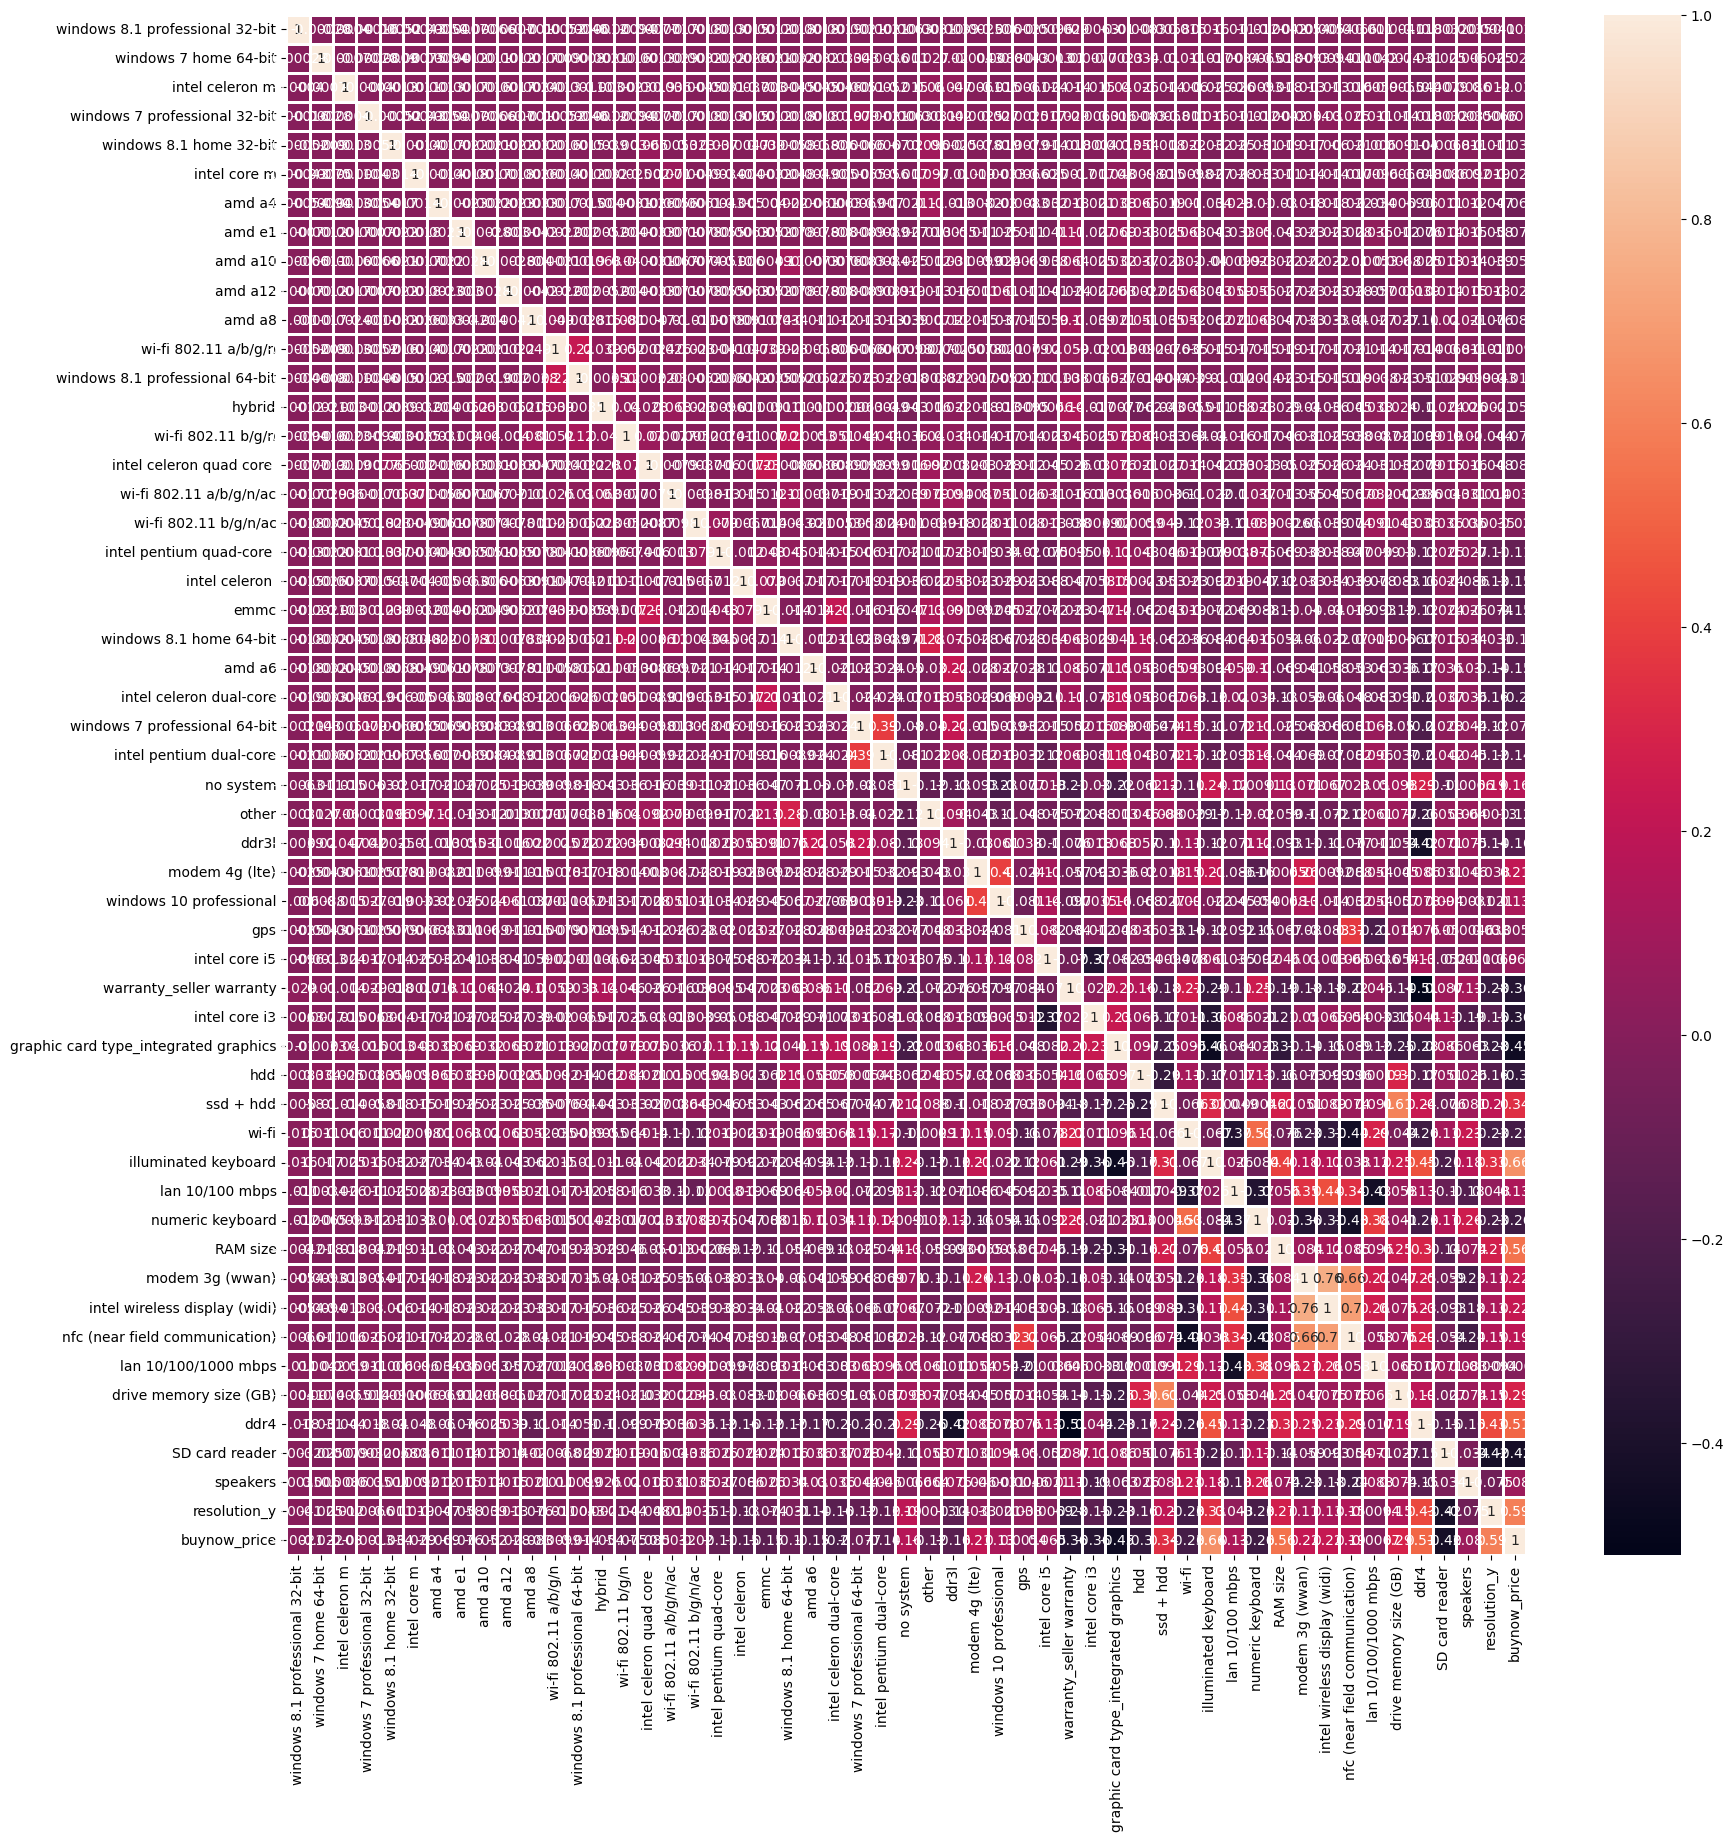

In [38]:
plt.figure(figsize=(20, 20)) # width and height in inches
corr_df = pd.concat([processed_data[selected_features], combined_data[label_column]], axis=1)
sns.heatmap(corr_df.corr(),annot=True, lw=1)
plt.show()

<a name="train/val/test-split"></a>
# Train/Val/Test Split

Creating index arrays for separating the datasets based on non-null values. It computes the indices of non-null values in the "train_data", "val_data", and "test_data" datasets and stores them in the arrays "train_indices", "val_indices", and "test_indices", respectively. These index arrays will be used to properly partition the datasets for training, validation, and testing purposes.






In [39]:

# Use the indices of given datasets to properly separate them
train_indices = train_data.dropna().index
val_indices = val_data.dropna().index
test_indices = test_data.dropna().index

Separating the processed data into training, validation, and test datasets using the index arrays created earlier. It utilizes the "loc" accessor to select rows from the "processed_data" DataFrame corresponding to the indices stored in "train_indices", "val_indices", and "test_indices". The resulting datasets, namely "train_data", "val_data", and "test_data", contain the processed features ready for model training and evaluation.




In [40]:

# Separate datasets
train_data = processed_data.loc[train_indices]
val_data = processed_data.loc[val_indices]
test_data = processed_data.loc[test_indices]

Preparing the feature and target variables for training, validation, and testing. It selects the features from the training, validation, and test datasets using the "selected_features" list and converts them to NumPy arrays using the to_numpy() method. Similarly, it extracts the corresponding label values from the combined data and converts them to NumPy arrays using the to_numpy() method. The ravel() method is then used to reshape the label arrays from shape (row_number, 1) to (row_number,), as required by sklearn machine learning models. The resulting variables, X_train, X_val, X_test, y_train, y_val, and y_test, are now properly formatted for model training and evaluation.

In [41]:



# Sklearn machine learning models expect y_train, y_test, y_val in the shape as (row_number,) instead of (row_number, 1) shape
X_train, X_val, X_test = train_data[selected_features].to_numpy(), val_data[selected_features].to_numpy(), test_data[selected_features].to_numpy()
y_train, y_val, y_test = combined_data.loc[train_indices][label_column].to_numpy().ravel(), combined_data.loc[val_indices][label_column].to_numpy().ravel(), combined_data.loc[test_indices][label_column].to_numpy().ravel()


<a name="classical-machine-learning"></a>

# Classical Machine Learning :

In our machine learning pipeline, we will explore a variety of models ranging from simple linear regression to ensemble methods to predict laptop prices. To ensure fair comparisons, we will use root-mean-squared-error (RMSE) as our evaluation metric. Additionally, we will employ MaxAbsScaler() from the sklearn library to scale our data. This scaling method is particularly suitable for sparse datasets like ours, preserving the sparse structure while effectively scaling the features. By systematically evaluating different models and their performance using RMSE, we aim to identify the most effective approach for predicting laptop prices based on their attributes. Our comprehensive analysis will enable us to make informed decisions about the choice of model and further refine our predictive capabilities.

In [42]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import matplotlib.pyplot as plt
import seaborn as sns


 Defining a function to calculate the Root Mean Squared Error (RMSE) between the true and predicted values. Another function perform_regression() is defined to conduct regression using different regressors, calculate RMSE, store the predictions, and plot the regression results. It utilizes a dictionary named regressors containing various regression models initialized with their respective parameters. Additionally, a DataFrame pred_df is created to store the actual values of the target variable and the predictions made by each regressor. Finally, the code iterates over each regressor in the dictionary, applies the perform_regression() function, and prints the RMSE value along with plotting the regression results. This process enables the comparison of the performance of different regression models in predicting the target variable.

Linear : 744.4691396440791


/home/qritrim/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP : 712.4953532764811
DecisionTree : 656.6811883268169
RandomForest : 557.0123635130183
GradientBoosting : 526.9818640941238
ExtraTrees : 577.5740215020353


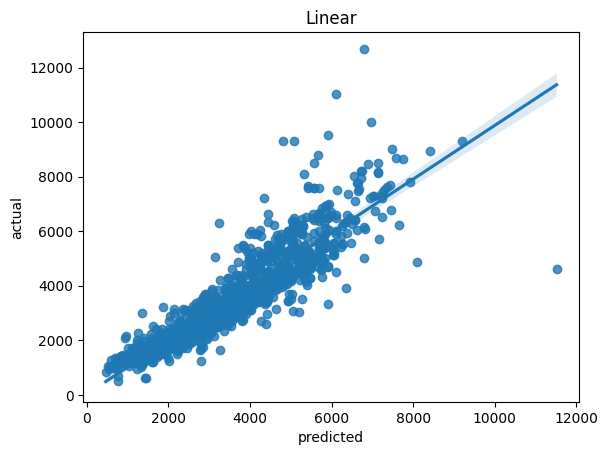

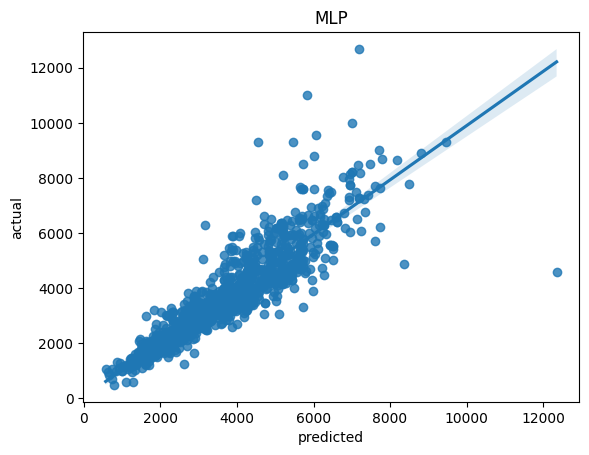

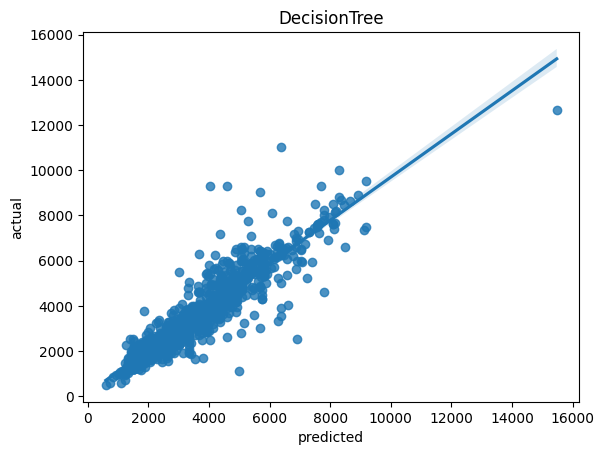

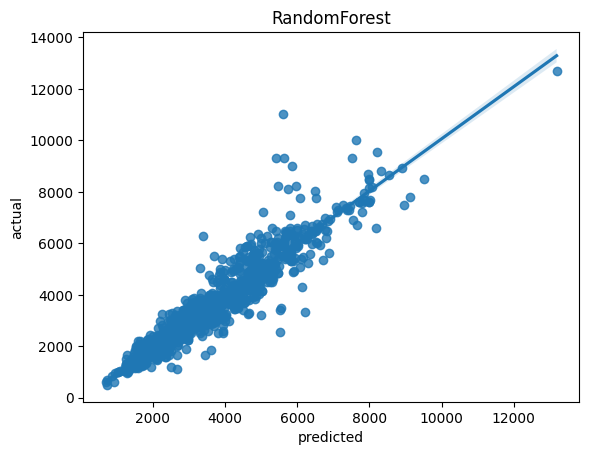

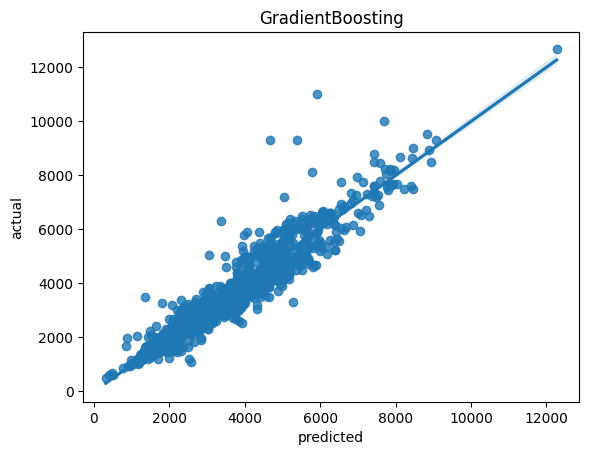

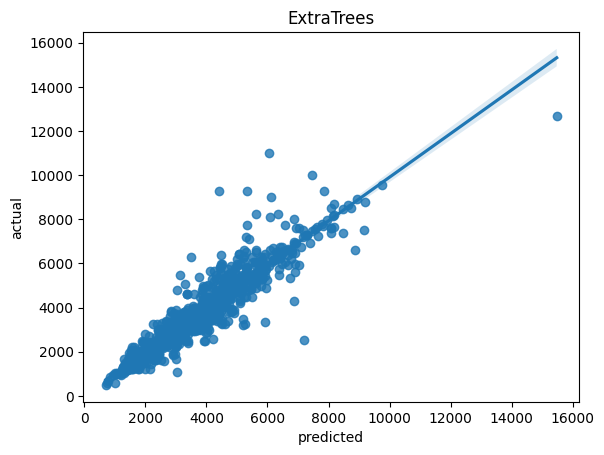

In [43]:
# Function to calculate Root Mean Squared Error
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

# Function to perform regression and print RMSE
def perform_regression(regressor_name, regressor):
    # Create pipeline with MaxAbsScaler and regressor
    pipe = make_pipeline(MaxAbsScaler(), regressor)
    pipe.fit(X_train, y_train)
    predicted = pipe.predict(X_test)
    rmse_val = rmse(y_test, predicted)
    print(regressor_name, ':', rmse_val)
    pred_df[regressor_name+'_Pred'] = predicted
    plt.figure(regressor_name)
    plt.title(regressor_name)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    sns.regplot(y=y_test,x=predicted)

# Dictionary of regressors
regressors = {
    'Linear' : LinearRegression(),
    'MLP': MLPRegressor(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.01),
    'DecisionTree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42, criterion='squared_error', loss='squared_error', learning_rate=0.6, warm_start=True),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
}

# DataFrame for storing predictions
pred_df = pd.DataFrame(columns=["Actual"])
pred_df["Actual"] = y_test

# Perform regression for each regressor
for key in regressors.keys():
    perform_regression(key, regressors[key])

<a name="voting-regressor"></a>

# Voting Regressor 

Importing the VotingRegressor class from the sklearn.ensemble module. It then creates ensemble regressors by selecting three different regressors from the existing regressors dictionary, namely GradientBoosting, ExtraTrees, and RandomForest. These regressors are assigned to variables reg1, reg2, and reg3, respectively. Subsequently, the code creates a new ensemble regressor named "Voting" using VotingRegressor, where each base regressor is assigned a weight. In this case, the weights are set to [0.4, 0.3, 0.3] for reg1, reg2, and reg3, respectively. Finally, the code calls the perform_regression() function to perform regression using the VotingRegressor and prints the RMSE value along with plotting the regression results for the ensemble model.

Voting : 504.98011543466674


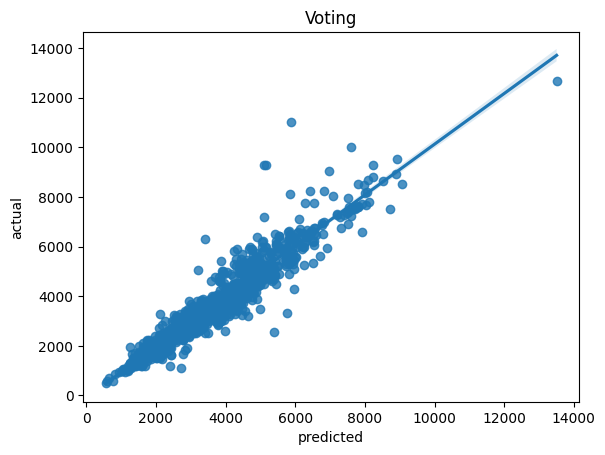

In [44]:
# Import VotingRegressor from sklearn.ensemble
from sklearn.ensemble import VotingRegressor

# Create ensemble regressors
reg1 = regressors["GradientBoosting"]
reg2 = regressors["ExtraTrees"]
reg3 = regressors["RandomForest"]

# Assign weights to their predictions and create new regressor
# It is possible to try with different weights
perform_regression("Voting", VotingRegressor([("gb", reg1), ("et", reg2), ("rf", reg3)], weights=[0.4, 0.3, 0.3]))


<a name="deep-learning"></a>

# Deep Learning : 

Incorporating artificial neural networks (ANNs) into our regression analysis presents a promising avenue for predicting laptop prices. Given our relatively small dataset, we will construct a modest ANN architecture with 4 hidden units, balancing model complexity with data size. To enhance the training process and prevent overfitting, we will implement a learning rate scheduler to gradually decrease the learning rate after a specified number of epochs. Additionally, we will employ EarlyStopping, a regularization technique, to halt training when validation loss stops improving, thereby preventing overfitting. We plan to compare the performance of a base model with a single hidden layer against that of a complex model with two hidden layers. By systematically evaluating the performance of these models, we aim to identify the architecture that yields the most accurate predictions of laptop prices based on their attributes. This comparative analysis will provide valuable insights into the effectiveness of ANN models in our regression task and guide further refinement of our predictive capabilities.


 Importing TensorFlow and Keras libraries and sets a random seed for reproducibility. Then, it defines a custom error metric called root_mean_squared_error using Keras backend operations. Additionally, a learning rate scheduler function is defined to adjust the learning rate during training epochs.

Two model architectures are defined using the Keras Sequential API. The first is a base model with a simple architecture consisting of normalization, dense, and dropout layers. The second is a more complex model with additional dense layers. Both models are compiled with the defined root_mean_squared_error loss function and the Adam optimizer with a specified learning rate.

These functions build and compile the models while specifying the input shape based on the number of selected features. The base model architecture consists of normalization, dense, dropout, and output layers, while the complex model architecture includes additional dense layers for increased complexity.

In [45]:
# Continuing with TensorFlow/Keras part...
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import backend as K

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the error metric using Keras background
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

# Define base model architecture
def build_and_compile_base_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(4, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss=root_mean_squared_error, optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None, len(selected_features)))
    return model

# Define complex model architecture
def build_and_compile_complex_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(8, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss=root_mean_squared_error, optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None, len(selected_features)))
    return model

2024-02-08 17:01:59.896118: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-08 17:01:59.923030: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 17:02:00.059964: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 17:02:00.060913: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-08 17:02:00.937757: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

 Initializing a learning rate scheduler and an early stopping callback for model training. The LearningRateScheduler is instantiated with the scheduler function defined earlier to adjust the learning rate during training epochs. The EarlyStopping callback is configured to monitor the validation loss, halt training if there is no improvement for 20 consecutive epochs (patience=20), and restore the best model weights based on the minimum validation loss.

Subsequently, the base model is built and compiled using the previously defined function build_and_compile_base_model(). The fit() method is then called to train the model on the training data (X_train, y_train) with validation data provided as (X_val, y_val). The callbacks parameter is used to pass the scheduler and early stopping callbacks for monitoring during training. The training process is verbose, displaying progress for each epoch, and is set to run for a maximum of 400 epochs. The training history is stored in the history variable for further analysis and visualization.





